# Problem Statement: Create a Machine Learning model using various Classification Models to predict rainfall.

### Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/nupoo/sydney_rain prediction.csv",header = 0)

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
5,06-02-2008,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
6,07-02-2008,Sydney,18.6,26.3,6.2,5.2,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes
7,08-02-2008,Sydney,17.2,22.3,27.6,5.8,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
8,09-02-2008,Sydney,16.4,20.8,12.6,4.8,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,Yes
9,10-02-2008,Sydney,14.6,24.2,8.8,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,No


In [4]:
df.shape

(3337, 17)

In [5]:
df.describe() #gives EDD(Extended Data Dictionary)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [6]:
df.info() #gives no. of columns and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


#### There are missing values almost in every column.

### Visualizations used in Data preprocessing

<Axes: xlabel='RainTomorrow', ylabel='count'>

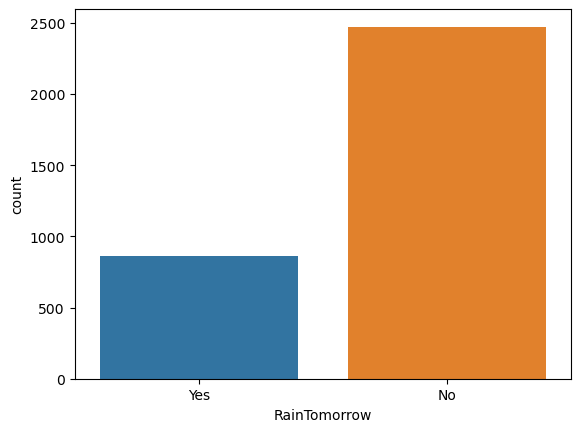

In [7]:
sns.countplot(x = "RainTomorrow", data = df) #countplot for categorical variables

<Axes: xlabel='RainToday', ylabel='count'>

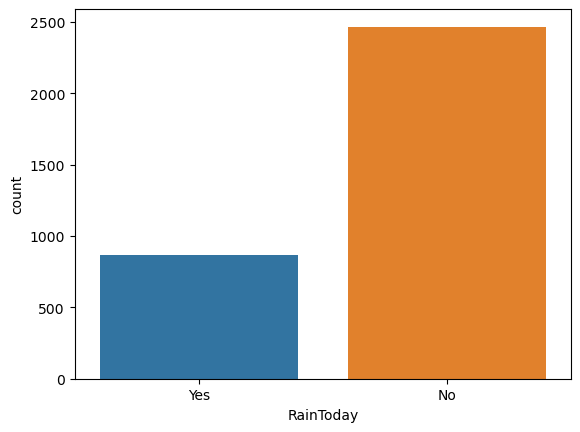

In [8]:
sns.countplot(x = "RainToday" ,data = df)

<Axes: xlabel='Location', ylabel='count'>

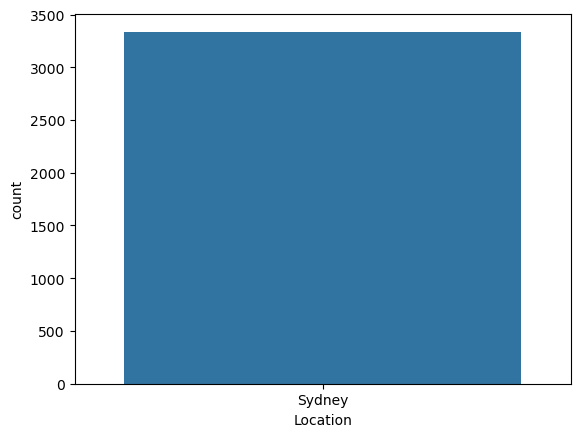

In [9]:
sns.countplot(x = "Location", data = df)

#### The "Location" column contain only "Sydney" value. It is the non-usable variable therefore, we can delete it as it will not impact on our model. 
#### Similarly, "Date" column is not that much useful for our model training therefore, we will drop it as well.

In [10]:
del df["Location"]

In [11]:
del df["Date"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


### Creating Dummy Variables

In [13]:
df = pd.get_dummies(df, drop_first = True) #create dummy variables for categorical variables like "RainToday" and "RainTomorrow"

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3334 non-null   float64
 1   MaxTemp           3335 non-null   float64
 2   Rainfall          3331 non-null   float64
 3   Evaporation       3286 non-null   float64
 4   Sunshine          3321 non-null   float64
 5   Humidity9am       3323 non-null   float64
 6   Humidity3pm       3324 non-null   float64
 7   Pressure9am       3317 non-null   float64
 8   Pressure3pm       3318 non-null   float64
 9   Cloud9am          2771 non-null   float64
 10  Cloud3pm          2776 non-null   float64
 11  Temp9am           3333 non-null   float64
 12  Temp3pm           3333 non-null   float64
 13  RainToday_Yes     3337 non-null   uint8  
 14  RainTomorrow_Yes  3337 non-null   uint8  
dtypes: float64(13), uint8(2)
memory usage: 345.6 KB


### Missing value Imputation
#There are various missing values in most the columns.
#Replace the nan value with mean of that column.

In [15]:
df.MinTemp = df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp = df.MaxTemp.fillna(df.MaxTemp.mean())
df.Rainfall = df.MinTemp.fillna(df.Rainfall.mean())
df.Evaporation = df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine = df.MinTemp.fillna(df.Sunshine.mean())
df.Humidity9am = df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm = df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Pressure9am = df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm = df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am = df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am = df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm = df.Temp3pm.fillna(df.Temp3pm.mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   uint8  
 14  RainTomorrow_Yes  3337 non-null   uint8  
dtypes: float64(13), uint8(2)
memory usage: 345.6 KB


 Take average of 

* Humidity9am and Humidity3pm
* Pressure9am and Pressure3pm
* Cloud9am and Cloud3pm
* Temp9am and Temp3pm

as it increases the same column in the data.

In [17]:
df["avg_Humidity"] = (df.Humidity9am + df.Humidity3pm)/2
df["avg_Pressure"] = (df.Pressure9am + df.Pressure3pm)/2
df["avg_Cloud"] = (df.Cloud9am + df.Cloud3pm)/2
df["avg_Temp"] = (df.Temp9am + df.Temp3pm)/2

In [18]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
0,19.5,22.4,19.5,6.200000,19.5,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,88.0,1017.50,8.0,20.80
1,19.5,25.6,19.5,3.400000,19.5,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,78.0,1017.15,7.0,23.60
2,21.6,24.5,21.6,2.400000,21.6,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,87.0,1016.15,7.5,23.25
3,20.2,22.8,20.2,2.200000,20.2,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,86.5,1013.00,8.0,21.15
4,19.7,25.7,19.7,5.187432,19.7,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,81.0,1006.55,8.0,24.00


After creating columns "avg_Humidity", "avg_Pressure", "avg_Cloud", "avg_Temp", we'll delete columns of Humidity9am and Humidity3pm, Pressure9am and Pressure3pm, Cloud9am and Cloud3pm, Temp9am and Temp3pm.

In [19]:
del df["Humidity9am"]
del df['Humidity3pm']
del df['Pressure9am']
del df['Pressure3pm']
del df["Cloud9am"]
del df["Cloud3pm"]
del df['Temp9am']
del df["Temp3pm"]

In [20]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
0,19.5,22.4,19.5,6.200000,19.5,1,1,88.0,1017.50,8.0,20.80
1,19.5,25.6,19.5,3.400000,19.5,1,1,78.0,1017.15,7.0,23.60
2,21.6,24.5,21.6,2.400000,21.6,1,1,87.0,1016.15,7.5,23.25
3,20.2,22.8,20.2,2.200000,20.2,1,1,86.5,1013.00,8.0,21.15
4,19.7,25.7,19.7,5.187432,19.7,1,1,81.0,1006.55,8.0,24.00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   RainToday_Yes     3337 non-null   uint8  
 6   RainTomorrow_Yes  3337 non-null   uint8  
 7   avg_Humidity      3337 non-null   float64
 8   avg_Pressure      3337 non-null   float64
 9   avg_Cloud         3337 non-null   float64
 10  avg_Temp          3337 non-null   float64
dtypes: float64(9), uint8(2)
memory usage: 241.3 KB


In [22]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,14.865057,5.187432,14.865057,0.259515,0.259215,61.464084,1017.182465,4.200091,19.676538
std,4.551593,4.493290,4.551593,2.756095,4.551593,0.438434,0.438269,14.258961,6.936721,2.204337,4.397214
min,4.300000,11.700000,4.300000,0.000000,4.300000,0.000000,0.000000,15.500000,988.850000,0.000000,9.300000
25%,11.000000,19.600000,11.000000,3.200000,11.000000,0.000000,0.000000,52.500000,1012.650000,2.500000,16.150000
50%,14.900000,22.800000,14.900000,4.800000,14.900000,0.000000,0.000000,62.000000,1017.350000,4.200091,19.700000
75%,18.700000,26.000000,18.700000,7.000000,18.700000,1.000000,1.000000,71.000000,1021.950000,6.000000,23.000000
max,27.600000,45.800000,27.600000,18.400000,27.600000,1.000000,1.000000,96.000000,1037.400000,8.000000,37.300000


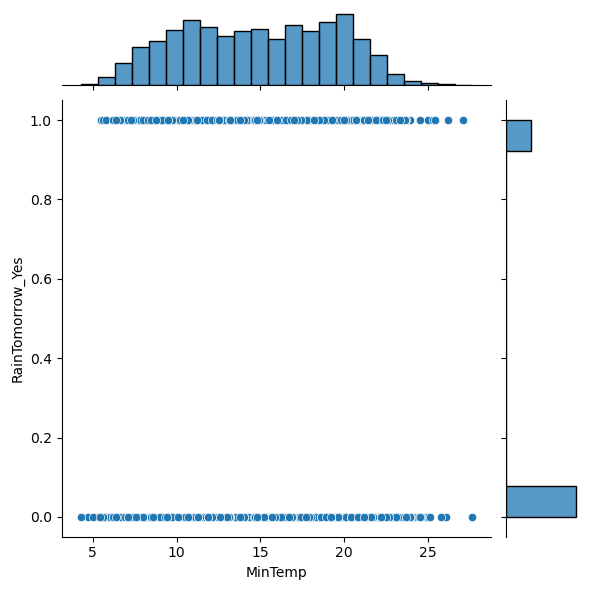

In [23]:
sns.jointplot(x = "MinTemp", y = "RainTomorrow_Yes", data = df) #jointplot will help to find the outliers

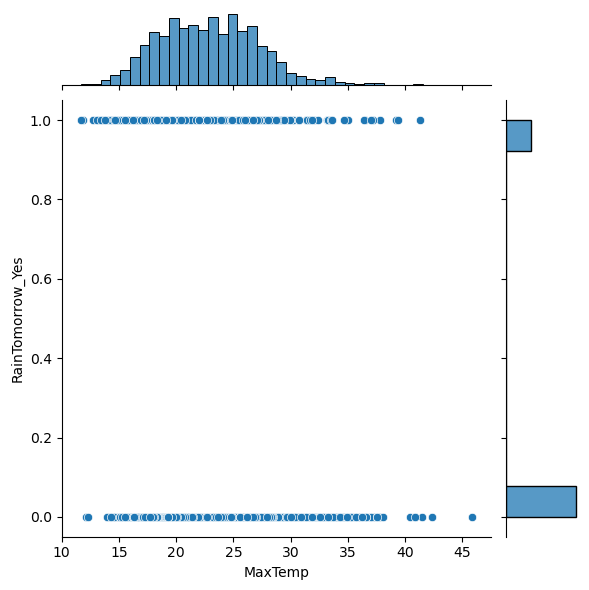

In [24]:
sns.jointplot(x = "MaxTemp", y = "RainTomorrow_Yes", data = df)

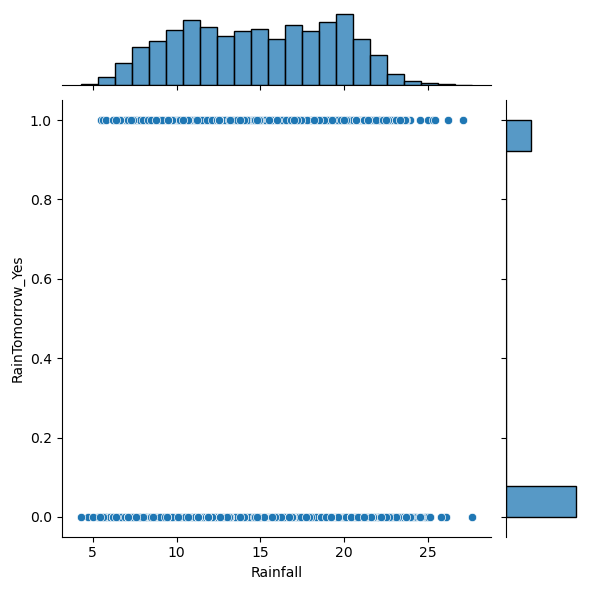

In [25]:
sns.jointplot(x = "Rainfall", y = "RainTomorrow_Yes", data = df)

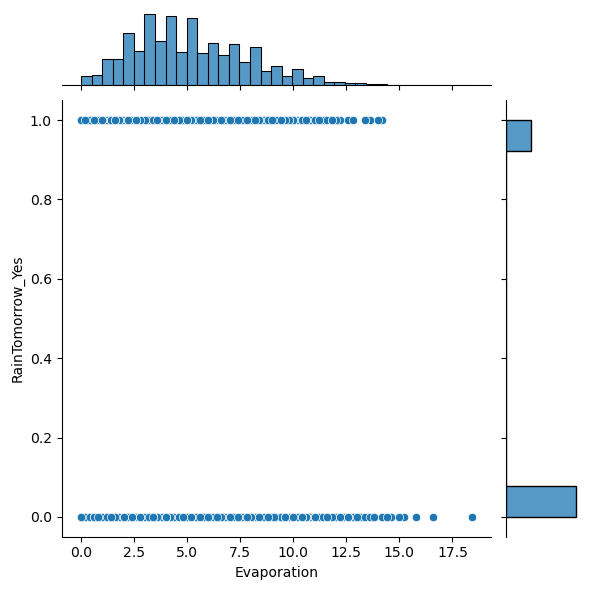

In [26]:
sns.jointplot(x = "Evaporation", y = "RainTomorrow_Yes", data = df)

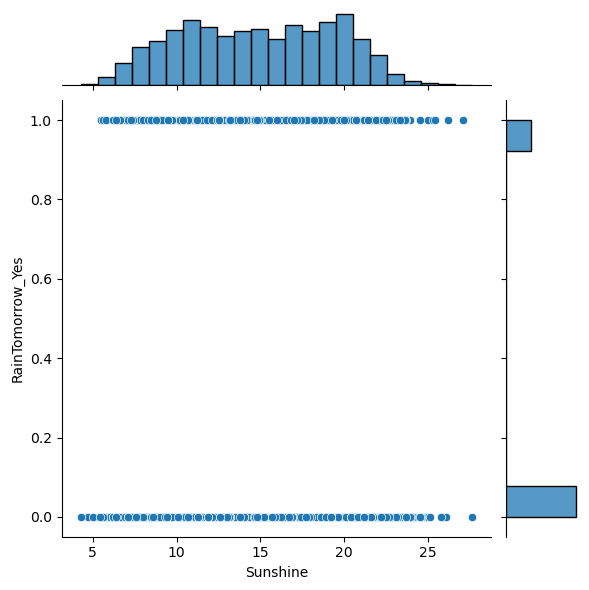

In [27]:
sns.jointplot(x = "Sunshine", y = "RainTomorrow_Yes", data = df)

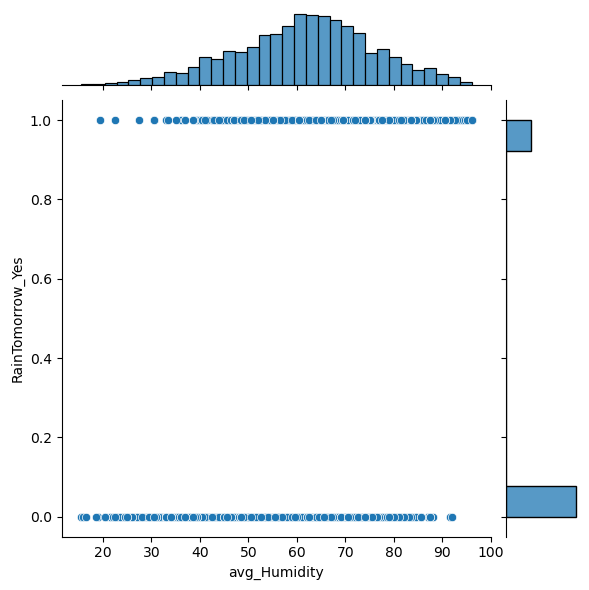

In [28]:
sns.jointplot(x = "avg_Humidity", y = "RainTomorrow_Yes", data = df)

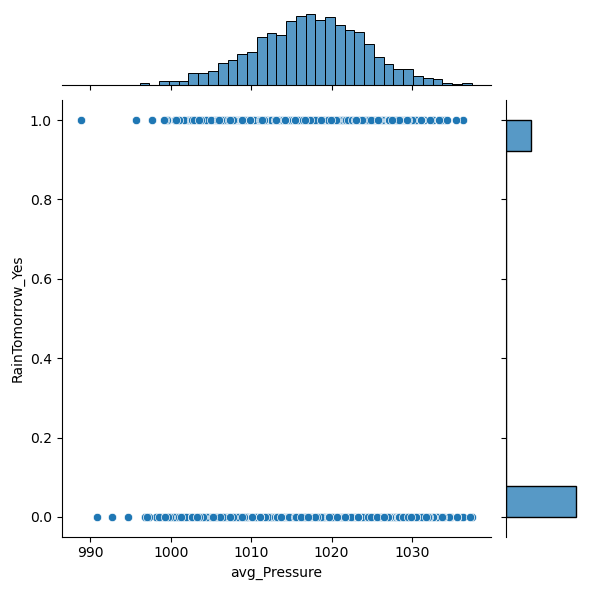

In [29]:
sns.jointplot(x = "avg_Pressure", y = "RainTomorrow_Yes", data = df)

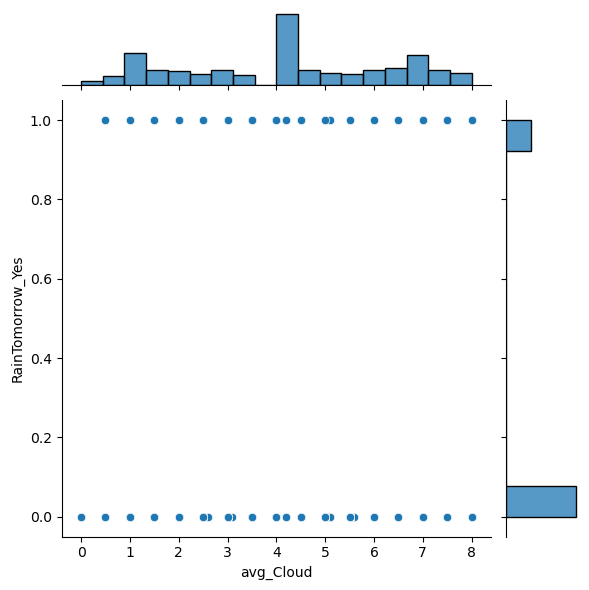

In [30]:
sns.jointplot(x = "avg_Cloud", y = "RainTomorrow_Yes", data = df)

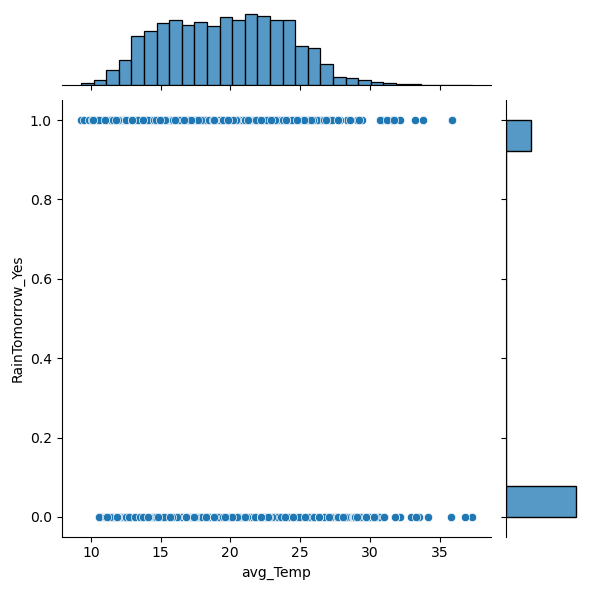

In [31]:
sns.jointplot(x = "avg_Temp", y = "RainTomorrow_Yes", data = df)

### Outlier treatment of column "MiniTemp"

In [32]:
np.percentile(df.MinTemp, [99])[0]  #gives 99 percentile value

23.5

In [33]:
uv = np.percentile(df.MinTemp, [99])[0]

In [34]:
df[(df.MinTemp> uv)] #values greater than uv

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
357,25.0,31.7,25.0,14.2,25.0,0,0,58.5,1008.40,1.500000,29.30
358,24.8,40.9,24.8,10.6,24.8,0,0,37.5,1003.80,4.000000,35.80
709,24.1,30.0,24.1,11.0,24.1,0,0,60.5,1015.75,1.500000,28.60
712,23.7,27.7,23.7,9.2,23.7,0,1,66.5,1010.95,3.500000,26.20
722,25.0,41.3,25.0,13.4,25.0,0,1,22.5,1006.60,5.000000,35.90
742,23.9,37.8,23.9,9.0,23.9,0,1,51.5,1007.10,6.500000,32.15
753,26.0,28.6,26.0,10.4,26.0,0,0,57.0,1014.95,4.000000,26.10
1094,26.1,31.2,26.1,12.8,26.1,0,0,64.5,1014.00,4.200091,28.55
1095,25.1,37.5,25.1,10.2,25.1,0,0,56.0,1010.45,4.200091,32.10
1096,24.0,33.7,24.0,5.2,24.0,0,0,72.5,1012.90,4.200091,27.55


In [35]:
df.MinTemp[(df.MinTemp > 3* uv)] = 3 * uv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\82628665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MinTemp[(df.MinTemp > 3* uv)] = 3 * uv


### Outlier Treatment of column "MaxTemp"

In [36]:
np.percentile(df.MaxTemp, [99])[0]

35.52799999999998

In [37]:
uv = np.percentile(df.MaxTemp, [99])[0]

In [38]:
df[(df.MaxTemp> uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
358,24.8,40.9,24.8,10.6,24.8,0,0,37.500000,1003.80,4.000000,35.80
641,18.9,36.9,18.9,6.2,18.9,0,0,45.500000,1009.25,6.000000,30.15
660,21.2,40.4,21.2,7.4,21.2,0,0,47.000000,1003.25,6.500000,31.90
722,25.0,41.3,25.0,13.4,25.0,0,1,22.500000,1006.60,5.000000,35.90
742,23.9,37.8,23.9,9.0,23.9,0,1,51.500000,1007.10,6.500000,32.15
1095,25.1,37.5,25.1,10.2,25.1,0,0,56.000000,1010.45,4.200091,32.10
1097,24.2,41.5,24.2,8.4,24.2,0,0,34.000000,1008.30,4.200091,37.30
1098,27.6,35.6,27.6,16.6,27.6,0,0,66.500000,1014.40,4.200091,25.75
1349,19.8,37.2,19.8,4.4,19.8,0,0,45.614505,1007.20,4.200091,30.55
1739,20.9,42.3,20.9,9.8,20.9,0,0,33.000000,1002.45,6.000000,33.55


In [39]:
df.MaxTemp[(df.MaxTemp > 3* uv)] = 3 * uv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\2007843357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxTemp[(df.MaxTemp > 3* uv)] = 3 * uv


In [40]:
np.percentile(df.MaxTemp, [1])[0]

14.4

In [41]:
lv =  np.percentile(df.MaxTemp, [1])[0] 

In [42]:
df[(df.MaxTemp < lv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
159,6.9,13.3,6.9,2.800000,6.9,0,1,50.0,1016.85,4.500000,11.40
175,9.8,12.7,9.8,2.400000,9.8,1,1,87.0,1021.35,7.500000,11.55
178,7.0,13.6,7.0,3.000000,7.0,1,1,79.0,1011.30,7.000000,9.30
203,10.2,11.9,10.2,3.400000,10.2,1,1,88.5,1015.80,8.000000,10.50
218,11.8,14.2,11.8,5.187432,11.8,1,1,90.0,1013.95,8.000000,12.65
264,9.9,14.3,9.9,6.000000,9.9,1,1,80.5,1022.00,7.000000,11.35
495,9.7,14.2,9.7,4.400000,9.7,0,0,34.5,1012.35,1.000000,12.05
881,7.6,12.1,7.6,2.000000,7.6,0,0,69.5,1025.15,7.500000,10.55
884,8.8,13.5,8.8,3.400000,8.8,0,1,79.5,1025.65,7.500000,11.40
1176,11.1,14.2,11.1,1.400000,11.1,1,1,70.5,1011.10,4.200091,13.10


In [43]:
df.MaxTemp[(df.MaxTemp < 0.3 * lv)] = 0.3* lv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\286073145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxTemp[(df.MaxTemp < 0.3 * lv)] = 0.3* lv


### Outlier treatment of column "Rainfall"

In [44]:
np.percentile(df.Rainfall, [99])[0]

23.5

In [45]:
uv = np.percentile(df.Rainfall, [99])[0]

In [46]:
df[(df.Rainfall > uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
357,25.0,31.7,25.0,14.2,25.0,0,0,58.5,1008.40,1.500000,29.30
358,24.8,40.9,24.8,10.6,24.8,0,0,37.5,1003.80,4.000000,35.80
709,24.1,30.0,24.1,11.0,24.1,0,0,60.5,1015.75,1.500000,28.60
712,23.7,27.7,23.7,9.2,23.7,0,1,66.5,1010.95,3.500000,26.20
722,25.0,41.3,25.0,13.4,25.0,0,1,22.5,1006.60,5.000000,35.90
742,23.9,37.8,23.9,9.0,23.9,0,1,51.5,1007.10,6.500000,32.15
753,26.0,28.6,26.0,10.4,26.0,0,0,57.0,1014.95,4.000000,26.10
1094,26.1,31.2,26.1,12.8,26.1,0,0,64.5,1014.00,4.200091,28.55
1095,25.1,37.5,25.1,10.2,25.1,0,0,56.0,1010.45,4.200091,32.10
1096,24.0,33.7,24.0,5.2,24.0,0,0,72.5,1012.90,4.200091,27.55


In [47]:
df.Rainfall[(df.Rainfall > 3* uv)] = 3 * uv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\1283795510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall > 3* uv)] = 3 * uv


### Outlier treatment of column "Evaporation"

In [48]:
np.percentile(df.Evaporation, [99])[0]

12.8

In [49]:
uv = np.percentile(df.Evaporation, [99])[0]

In [50]:
df[(df.Evaporation > uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
349,23.0,33.4,23.0,14.2,23.0,0,1,50.0,1007.55,5.090761,30.85
357,25.0,31.7,25.0,14.2,25.0,0,0,58.5,1008.40,1.500000,29.30
359,20.5,25.9,20.5,13.6,20.5,0,0,54.0,1018.90,6.000000,23.30
373,21.4,28.6,21.4,14.2,21.4,0,0,61.0,1009.15,0.500000,26.15
642,19.4,19.9,19.4,13.2,19.4,0,0,73.5,1016.70,8.000000,19.40
661,19.9,22.8,19.9,13.4,19.9,0,0,65.0,1021.80,7.500000,20.90
686,20.2,21.4,20.2,13.6,20.2,1,1,85.0,1015.40,8.000000,19.35
722,25.0,41.3,25.0,13.4,25.0,0,1,22.5,1006.60,5.000000,35.90
1098,27.6,35.6,27.6,16.6,27.6,0,0,66.5,1014.40,4.200091,25.75
1400,20.7,29.4,20.7,13.4,20.7,0,0,64.0,1011.40,4.200091,26.40


In [51]:
df.Evaporation[(df.Evaporation > 3* uv)] = 3 * uv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\2390018271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Evaporation[(df.Evaporation > 3* uv)] = 3 * uv


### Outlier treatment of column "Sunshine"

In [52]:
np.percentile(df.Sunshine, [99])[0]

23.5

In [53]:
uv = np.percentile(df.Sunshine, [99])[0]

In [54]:
df[(df.Sunshine > uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
357,25.0,31.7,25.0,14.2,25.0,0,0,58.5,1008.40,1.500000,29.30
358,24.8,40.9,24.8,10.6,24.8,0,0,37.5,1003.80,4.000000,35.80
709,24.1,30.0,24.1,11.0,24.1,0,0,60.5,1015.75,1.500000,28.60
712,23.7,27.7,23.7,9.2,23.7,0,1,66.5,1010.95,3.500000,26.20
722,25.0,41.3,25.0,13.4,25.0,0,1,22.5,1006.60,5.000000,35.90
742,23.9,37.8,23.9,9.0,23.9,0,1,51.5,1007.10,6.500000,32.15
753,26.0,28.6,26.0,10.4,26.0,0,0,57.0,1014.95,4.000000,26.10
1094,26.1,31.2,26.1,12.8,26.1,0,0,64.5,1014.00,4.200091,28.55
1095,25.1,37.5,25.1,10.2,25.1,0,0,56.0,1010.45,4.200091,32.10
1096,24.0,33.7,24.0,5.2,24.0,0,0,72.5,1012.90,4.200091,27.55


In [55]:
df.Sunshine[(df.Sunshine > 3* uv)] = 3 * uv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\2887198145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sunshine[(df.Sunshine > 3* uv)] = 3 * uv


### Outlier treatment of column "avg_Humidity"

In [56]:
np.percentile(df.avg_Humidity, [1])[0]

27.0

In [57]:
lv =  np.percentile(df.avg_Humidity, [1])[0] 

In [58]:
df[(df.avg_Humidity < lv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
304,17.6,31.3,17.6,7.6,17.6,0,0,25.0,1006.85,5.000000,27.85
572,12.0,21.6,12.0,8.4,12.0,0,0,26.0,1011.95,0.000000,18.20
590,17.3,32.2,17.3,8.2,17.3,0,0,20.5,1017.55,0.000000,28.55
603,17.1,19.6,17.1,11.2,17.1,0,0,21.5,1004.40,2.000000,18.05
604,10.1,17.2,10.1,8.0,10.1,0,0,26.5,1005.25,2.000000,15.40
608,14.9,33.1,14.9,7.0,14.9,0,0,15.5,1010.55,2.000000,29.20
667,19.5,30.5,19.5,10.6,19.5,0,0,24.0,999.80,2.500000,27.30
722,25.0,41.3,25.0,13.4,25.0,0,1,22.5,1006.60,5.000000,35.90
1288,11.1,26.7,11.1,5.2,11.1,0,0,25.5,1019.65,4.200091,22.50
1294,17.5,28.1,17.5,8.0,17.5,0,0,25.5,1005.60,4.200091,24.30


In [59]:
df.avg_Humidity[(df.avg_Humidity < 0.3 * lv)] = 0.3* lv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\3674076444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_Humidity[(df.avg_Humidity < 0.3 * lv)] = 0.3* lv


In [60]:
np.percentile(df.avg_Humidity, [99])[0]

91.5

In [61]:
uv = np.percentile(df.avg_Humidity, [99])[0]

In [62]:
df[(df.avg_Humidity > uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
122,14.3,17.6,14.3,1.800000,14.3,1,1,93.5,1026.05,7.500000,16.20
123,15.2,19.1,15.2,0.400000,15.2,1,1,94.0,1025.25,8.000000,16.15
129,13.0,16.9,13.0,1.200000,13.0,1,1,92.5,1029.45,7.500000,15.05
271,16.8,17.3,16.8,4.600000,16.8,1,1,92.0,1024.05,8.000000,16.95
361,20.2,23.9,20.2,1.800000,20.2,1,1,94.0,1020.50,8.000000,21.60
736,20.5,22.4,20.5,5.000000,20.5,1,1,95.0,1015.95,7.500000,21.90
837,12.4,15.4,12.4,1.000000,12.4,1,1,93.0,1017.80,8.000000,13.95
842,9.5,14.7,9.5,5.000000,9.5,1,1,92.0,1022.20,6.500000,12.35
845,13.4,17.3,13.4,2.200000,13.4,1,1,95.0,1004.85,8.000000,14.55
907,11.2,15.2,11.2,1.600000,11.2,1,1,93.0,1027.30,8.000000,13.35


In [63]:
df.avg_Humidity[(df.avg_Humidity > 3* uv)] = 3 * uv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\3206245967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_Humidity[(df.avg_Humidity > 3* uv)] = 3 * uv


### Outlier treatmetnt of column "avg_Pressure"

In [64]:
np.percentile(df.avg_Pressure, [1])[0]

1000.55

In [65]:
lv =  np.percentile(df.avg_Pressure, [1])[0] 

In [66]:
df[(df.avg_Pressure < lv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
6,18.6,26.3,18.6,5.200000,18.6,1,1,77.5,999.65,5.500000,22.00
293,17.3,27.6,17.3,4.600000,17.3,1,0,64.5,999.30,4.000000,24.35
294,16.7,27.7,16.7,7.000000,16.7,0,0,40.0,998.80,2.000000,22.90
295,17.9,20.6,17.9,10.000000,17.9,0,0,39.5,990.80,4.500000,18.75
296,12.2,19.7,12.2,9.800000,12.2,0,1,52.5,988.85,6.000000,16.10
316,17.0,32.9,17.0,4.800000,17.0,1,0,53.5,992.65,5.000000,28.50
317,19.2,25.4,19.2,12.000000,19.2,0,0,37.0,996.95,3.000000,22.70
600,17.0,21.8,17.0,11.200000,17.0,1,0,38.0,997.30,6.000000,19.10
620,17.0,24.5,17.0,5.000000,17.0,0,0,29.5,1000.35,1.500000,22.05
667,19.5,30.5,19.5,10.600000,19.5,0,0,24.0,999.80,2.500000,27.30


In [67]:
df.avg_Pressure[(df.avg_Pressure < 0.3 * lv)] = 0.3* lv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\4017580695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_Pressure[(df.avg_Pressure < 0.3 * lv)] = 0.3* lv


### Outlier treatment of column "avg_Temp"

In [68]:
np.percentile(df.avg_Temp, [99])[0]

30.06399999999999

In [69]:
uv = np.percentile(df.avg_Temp, [99])[0]

In [70]:
df[(df.avg_Temp > uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
245,22.5,34.8,22.5,8.6,22.5,0,1,30.500000,1012.55,4.000000,31.75
273,16.9,35.0,16.9,3.2,16.9,0,0,38.500000,1007.65,6.500000,30.10
349,23.0,33.4,23.0,14.2,23.0,0,1,50.000000,1007.55,5.090761,30.85
356,23.4,33.6,23.4,8.0,23.4,0,0,48.500000,1007.20,5.000000,30.25
358,24.8,40.9,24.8,10.6,24.8,0,0,37.500000,1003.80,4.000000,35.80
641,18.9,36.9,18.9,6.2,18.9,0,0,45.500000,1009.25,6.000000,30.15
660,21.2,40.4,21.2,7.4,21.2,0,0,47.000000,1003.25,6.500000,31.90
722,25.0,41.3,25.0,13.4,25.0,0,1,22.500000,1006.60,5.000000,35.90
742,23.9,37.8,23.9,9.0,23.9,0,1,51.500000,1007.10,6.500000,32.15
1095,25.1,37.5,25.1,10.2,25.1,0,0,56.000000,1010.45,4.200091,32.10


In [71]:
df.avg_Temp[(df.avg_Temp > 3* uv)] = 3 * uv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\794013624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_Temp[(df.avg_Temp > 3* uv)] = 3 * uv


In [72]:
np.percentile(df.avg_Temp, [1])[0]

11.318000000000001

In [73]:
lv =  np.percentile(df.avg_Temp, [1])[0] 

In [74]:
df[(df.avg_Temp < lv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
154,8.2,15.0,8.2,2.400000,8.2,1,1,86.0,1028.60,7.000000,11.00
173,5.5,14.7,5.5,4.000000,5.5,0,1,64.0,1030.55,6.000000,10.55
178,7.0,13.6,7.0,3.000000,7.0,1,1,79.0,1011.30,7.000000,9.30
179,8.0,15.0,8.0,1.400000,8.0,1,0,72.5,1016.15,6.000000,11.30
188,8.3,16.5,8.3,0.400000,8.3,0,1,74.5,1016.25,4.000000,11.15
203,10.2,11.9,10.2,3.400000,10.2,1,1,88.5,1015.80,8.000000,10.50
521,6.2,15.7,6.2,3.000000,6.2,0,0,61.0,1019.30,6.000000,11.15
876,6.7,14.9,6.7,2.800000,6.7,0,0,62.5,1019.95,3.500000,11.00
877,5.5,15.8,5.5,2.000000,5.5,0,0,52.0,1019.35,1.000000,11.15
878,4.7,14.4,4.7,2.600000,4.7,0,0,49.5,1018.55,0.000000,10.70


In [75]:
df.avg_Temp[(df.avg_Temp < 0.3 * lv)] = 0.3* lv

C:\Users\nupoo\AppData\Local\Temp\ipykernel_19104\3992676069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_Temp[(df.avg_Temp < 0.3 * lv)] = 0.3* lv


### Correlation Analysis

In [76]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
0,19.5,22.4,19.5,6.200000,19.5,1,1,88.0,1017.50,8.0,20.80
1,19.5,25.6,19.5,3.400000,19.5,1,1,78.0,1017.15,7.0,23.60
2,21.6,24.5,21.6,2.400000,21.6,1,1,87.0,1016.15,7.5,23.25
3,20.2,22.8,20.2,2.200000,20.2,1,1,86.5,1013.00,8.0,21.15
4,19.7,25.7,19.7,5.187432,19.7,1,1,81.0,1006.55,8.0,24.00


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   RainToday_Yes     3337 non-null   uint8  
 6   RainTomorrow_Yes  3337 non-null   uint8  
 7   avg_Humidity      3337 non-null   float64
 8   avg_Pressure      3337 non-null   float64
 9   avg_Cloud         3337 non-null   float64
 10  avg_Temp          3337 non-null   float64
dtypes: float64(9), uint8(2)
memory usage: 241.3 KB


In [78]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,14.865057,5.187432,14.865057,0.259515,0.259215,61.464084,1017.182465,4.200091,19.676538
std,4.551593,4.493290,4.551593,2.756095,4.551593,0.438434,0.438269,14.258961,6.936721,2.204337,4.397214
min,4.300000,11.700000,4.300000,0.000000,4.300000,0.000000,0.000000,15.500000,988.850000,0.000000,9.300000
25%,11.000000,19.600000,11.000000,3.200000,11.000000,0.000000,0.000000,52.500000,1012.650000,2.500000,16.150000
50%,14.900000,22.800000,14.900000,4.800000,14.900000,0.000000,0.000000,62.000000,1017.350000,4.200091,19.700000
75%,18.700000,26.000000,18.700000,7.000000,18.700000,1.000000,1.000000,71.000000,1021.950000,6.000000,23.000000
max,27.600000,45.800000,27.600000,18.400000,27.600000,1.000000,1.000000,96.000000,1037.400000,8.000000,37.300000


In [79]:
df.corr() #it shows the relationship between the variables. 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,avg_Humidity,avg_Pressure,avg_Cloud,avg_Temp
MinTemp,1.000000,0.770701,1.000000,0.567623,1.000000,0.018690,0.079962,0.182140,-0.378135,0.223655,0.890452
MaxTemp,0.770701,1.000000,0.770701,0.509060,0.770701,-0.188334,-0.149269,-0.185496,-0.410688,-0.103859,0.947567
Rainfall,1.000000,0.770701,1.000000,0.567623,1.000000,0.018690,0.079962,0.182140,-0.378135,0.223655,0.890452
Evaporation,0.567623,0.509060,0.567623,1.000000,0.567623,-0.228791,-0.064301,-0.266144,-0.326214,-0.041993,0.568649
Sunshine,1.000000,0.770701,1.000000,0.567623,1.000000,0.018690,0.079962,0.182140,-0.378135,0.223655,0.890452
RainToday_Yes,0.018690,-0.188334,0.018690,-0.228791,0.018690,1.000000,0.340894,0.407017,0.028742,0.322300,-0.134279
RainTomorrow_Yes,0.079962,-0.149269,0.079962,-0.064301,0.079962,0.340894,1.000000,0.442395,-0.010834,0.413113,-0.092813
avg_Humidity,0.182140,-0.185496,0.182140,-0.266144,0.182140,0.407017,0.442395,1.000000,0.234312,0.516801,-0.102875
avg_Pressure,-0.378135,-0.410688,-0.378135,-0.326214,-0.378135,0.028742,-0.010834,0.234312,1.000000,-0.009590,-0.413743
avg_Cloud,0.223655,-0.103859,0.223655,-0.041993,0.223655,0.322300,0.413113,0.516801,-0.009590,1.000000,-0.015282


From correlation analysis we can see the high correlation (0.9) between "avg_Temp" and "MaxTemp" which leads to Multicollinearity. Therefore, we will delete "avg_Temp" as "MinTemp" and "MaxTemp"  are already present to show the temperature.

In [80]:
del df['avg_Temp']

### X-y Split

In [81]:
X = df.loc[: , df.columns != 'RainTomorrow_Yes'] #Independent variables

In [82]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday_Yes,avg_Humidity,avg_Pressure,avg_Cloud
0,19.5,22.4,19.5,6.200000,19.5,1,88.0,1017.50,8.0
1,19.5,25.6,19.5,3.400000,19.5,1,78.0,1017.15,7.0
2,21.6,24.5,21.6,2.400000,21.6,1,87.0,1016.15,7.5
3,20.2,22.8,20.2,2.200000,20.2,1,86.5,1013.00,8.0
4,19.7,25.7,19.7,5.187432,19.7,1,81.0,1006.55,8.0


In [83]:
X.shape

(3337, 9)

In [84]:
y = df['RainTomorrow_Yes'] #Dependent Variable

In [85]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: uint8

In [86]:
y.shape

(3337,)

### Train-Test-Split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
#split the data into training and test data such that training:test :: 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0) 

In [89]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2669, 9) (668, 9) (2669,) (668,)


### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
clf_lr = LogisticRegression()

In [92]:
clf_lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
clf_lr.intercept_

array([0.00896867])

In [94]:
clf_lr.coef_

array([[-0.00539955, -0.04955205, -0.00539955,  0.1040236 , -0.00539955,
         0.75176688,  0.06521203, -0.00611489,  0.32467989]])

In [95]:
y_train_pred = clf_lr.predict(X_train) #predictive value for the train data

In [96]:
y_test_pred = clf_lr.predict(X_test) #predictive value for the test data

### Evaluating Model Performance

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [98]:
#confusion matrix shows how well predictions are fair against the true values.
confusion_matrix(y_train, y_train_pred) 

array([[1838,  124],
       [ 338,  369]], dtype=int64)

In [99]:
confusion_matrix(y_test, y_test_pred)

array([[469,  41],
       [ 83,  75]], dtype=int64)

In [100]:
accuracy_score(y_train, y_train_pred)

0.8269014612214313

In [101]:
accuracy_score(y_test, y_test_pred)

0.8143712574850299

In [102]:
precision_score(y_train, y_train_pred)

0.7484787018255578

In [103]:
precision_score(y_test, y_test_pred)

0.646551724137931

In [104]:
recall_score(y_train, y_train_pred)

0.521923620933522

In [105]:
recall_score(y_test, y_test_pred)

0.47468354430379744

In [106]:
roc_auc_score(y_train, y_train_pred)

0.7293614027195643

In [107]:
roc_auc_score(y_test, y_test_pred)

0.697145693720526

### Linear Discriminant Analysis 

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [109]:
clf_lda = LinearDiscriminantAnalysis()

In [110]:
clf_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [111]:
y_train_pred_lda = clf_lda.predict(X_train)

In [112]:
y_test_pred_lda = clf_lda.predict(X_test)

### Evaluating Model Performance

In [113]:
confusion_matrix(y_train, y_train_pred_lda)

array([[1826,  136],
       [ 334,  373]], dtype=int64)

In [114]:
confusion_matrix(y_test, y_test_pred_lda)

array([[466,  44],
       [ 80,  78]], dtype=int64)

In [115]:
accuracy_score(y_train, y_train_pred_lda)

0.8239040839265642

In [116]:
accuracy_score(y_test, y_test_pred_lda)

0.8143712574850299

In [117]:
precision_score(y_train, y_train_pred_lda)

0.7328094302554028

In [118]:
precision_score(y_test, y_test_pred_lda)

0.639344262295082

In [119]:
recall_score(y_train, y_train_pred_lda)

0.5275813295615276

In [120]:
recall_score(y_test, y_test_pred_lda)

0.4936708860759494

In [121]:
roc_auc_score(y_train, y_train_pred_lda)

0.7291321530580317

In [122]:
roc_auc_score(y_test, y_test_pred_lda)

0.7036981881360138

### K-Nearest Neighbors

In [123]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [124]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
params = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}

In [128]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [129]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [130]:
grid_search_cv.best_params_

{'n_neighbors': 7}

In [131]:
optimised_KNN = grid_search_cv.best_estimator_

In [132]:
y_train_pred_knn = optimised_KNN.predict(X_train_s)

In [133]:
y_test_pred_knn = optimised_KNN.predict(X_test_s)

### Evaluating Model Performance

In [134]:
confusion_matrix(y_train, y_train_pred_knn)

array([[1873,   89],
       [ 311,  396]], dtype=int64)

In [135]:
confusion_matrix(y_test, y_test_pred_knn)

array([[463,  47],
       [ 88,  70]], dtype=int64)

In [136]:
accuracy_score(y_train, y_train_pred_knn)

0.8501311352566504

In [137]:
accuracy_score(y_test, y_test_pred_knn)

0.7979041916167665

In [138]:
precision_score(y_train, y_train_pred_knn)

0.8164948453608247

In [139]:
precision_score(y_test, y_test_pred_knn)

0.5982905982905983

In [140]:
recall_score(y_train, y_train_pred_knn)

0.5601131541725601

In [141]:
recall_score(y_test, y_test_pred_knn)

0.4430379746835443

In [142]:
roc_auc_score(y_train, y_train_pred_knn)

0.7573756392677276

In [143]:
roc_auc_score(y_test, y_test_pred_knn)

0.6754405559692231

### Decision Trees

In [144]:
from sklearn import tree

In [145]:
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)

In [146]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [147]:
y_train_pred_dt = clf_tree.predict(X_train)

In [148]:
y_test_pred_dt = clf_tree.predict(X_test)

### Evaluating Model Performance

In [149]:
confusion_matrix(y_train, y_train_pred_dt)

array([[1907,   55],
       [ 446,  261]], dtype=int64)

In [150]:
confusion_matrix(y_test, y_test_pred_dt)

array([[495,  15],
       [108,  50]], dtype=int64)

In [151]:
accuracy_score(y_train, y_train_pred_dt)

0.8122892469089547

In [152]:
accuracy_score(y_test, y_test_pred_dt)

0.8158682634730539

In [153]:
precision_score(y_train, y_train_pred_dt)

0.8259493670886076

In [154]:
precision_score(y_test, y_test_pred_dt)

0.7692307692307693

In [155]:
recall_score(y_train, y_train_pred_dt)

0.36916548797736914

In [156]:
recall_score(y_test, y_test_pred_dt)

0.31645569620253167

In [157]:
roc_auc_score(y_train, y_train_pred_dt)

0.6705664341008151

In [158]:
roc_auc_score(y_test, y_test_pred_dt)

0.6435219657483247

### Plotting Decision Trees

In [159]:
from sklearn.tree import plot_tree

In [160]:
df_feature_names = list(X_train.columns)

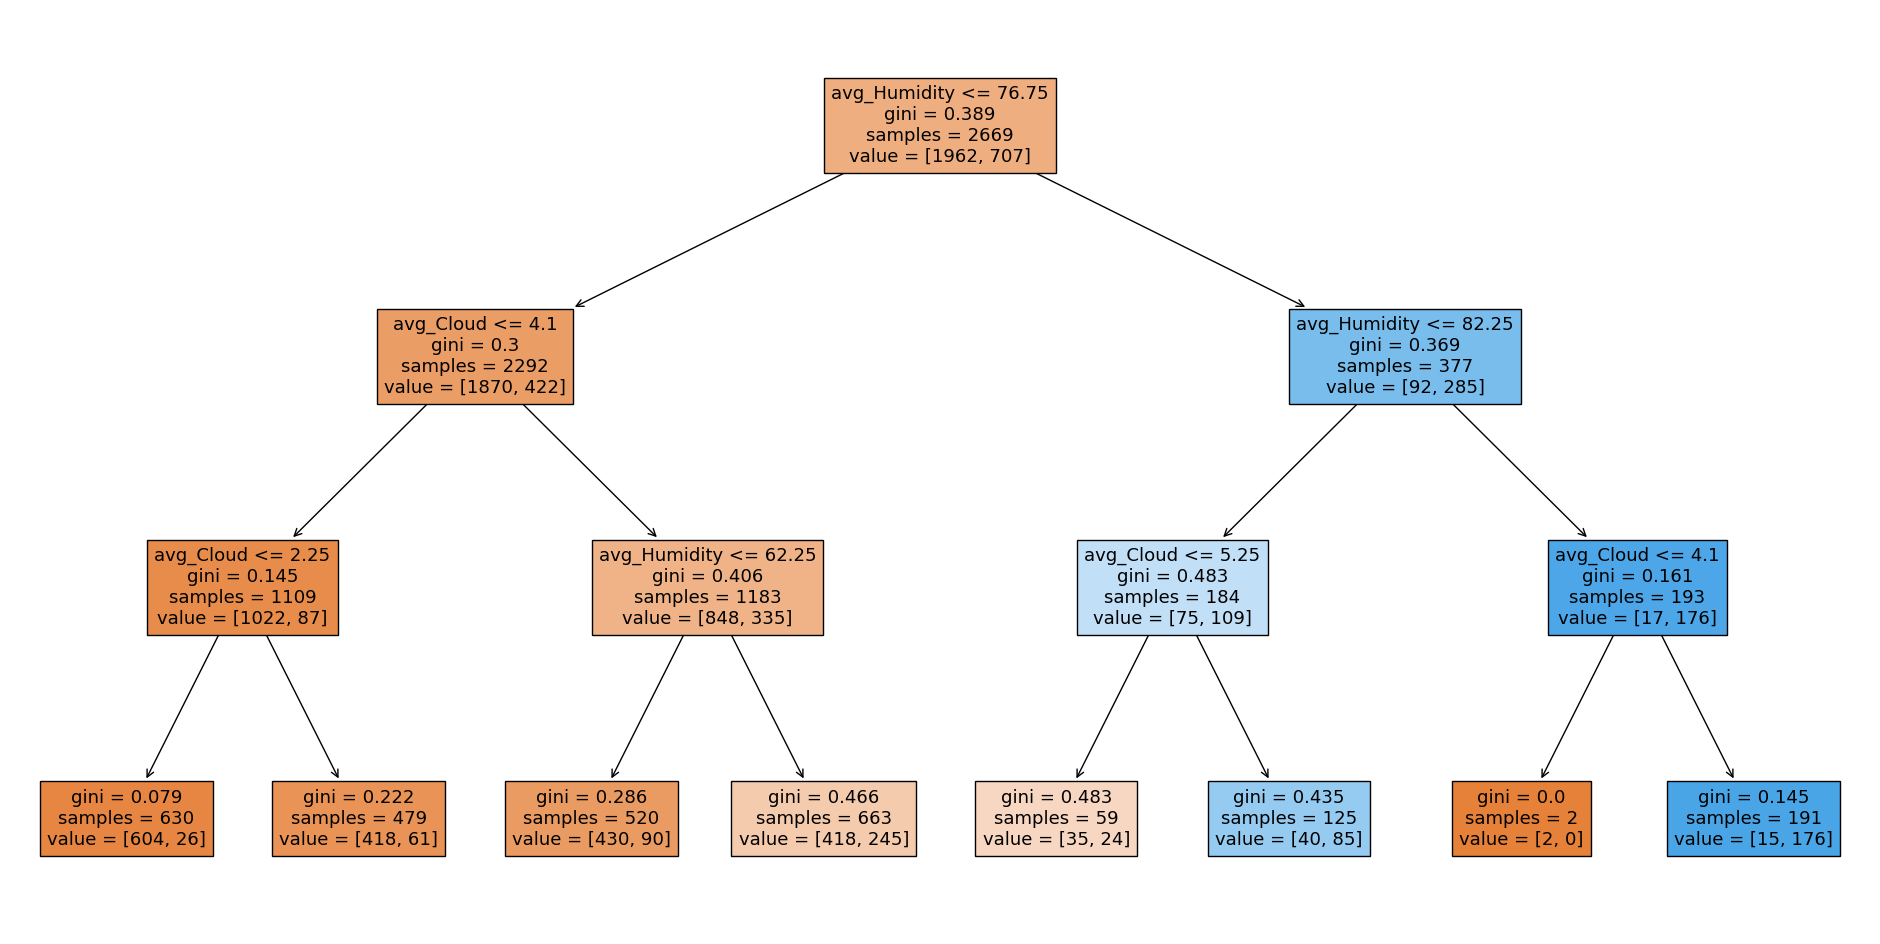

In [161]:
plt.figure(figsize = (24,12))
plot_tree(clf_tree, feature_names = df_feature_names, filled = True)
plt.show()

### Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf_clf = RandomForestClassifier( n_jobs = -1, random_state = 42)

In [164]:
params_grid = {"n_estimators" : [1000, 750, 500, 250], 
              "max_features" : [4,5,6,7,8]}

In [165]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [166]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8],
                         'n_estimators': [1000, 750, 500, 250]},
             scoring='accuracy')

In [167]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 250}

In [168]:
cvrf_clf = grid_search.best_estimator_

In [169]:
y_train_pred_rf = cvrf_clf.predict(X_train)

In [170]:
y_test_pred_rf = cvrf_clf.predict(X_test)

### Evaluating Model Performance

In [171]:
confusion_matrix(y_train, y_train_pred_rf)

array([[1962,    0],
       [   0,  707]], dtype=int64)

In [173]:
confusion_matrix(y_test, y_test_pred_rf)

array([[465,  45],
       [ 78,  80]], dtype=int64)

In [174]:
accuracy_score(y_train, y_train_pred_rf)

1.0

In [175]:
accuracy_score(y_test, y_test_pred_rf)

0.8158682634730539

In [176]:
precision_score(y_train, y_train_pred_rf)

1.0

In [177]:
precision_score(y_test, y_test_pred_rf)

0.64

In [178]:
recall_score(y_train, y_train_pred_rf)

1.0

In [179]:
recall_score(y_test, y_test_pred_rf)

0.5063291139240507

In [180]:
roc_auc_score(y_train, y_train_pred_rf)

1.0

In [181]:
roc_auc_score(y_test, y_test_pred_rf)

0.7090469099032017

### Bagging along Random Forest

In [182]:
rf_clf1 = RandomForestClassifier(n_estimators = 250, max_features = 4, max_depth = 3, n_jobs = -1, random_state = 42)

In [183]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=250, n_jobs=-1,
                       random_state=42)

In [184]:
from sklearn.ensemble import BaggingClassifier

In [185]:
bag_clf = BaggingClassifier(base_estimator = rf_clf1, n_estimators = 1000, bootstrap = True, n_jobs = -1, random_state = 42)

In [186]:
bag_clf.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=3,
                                                        max_features=4,
                                                        n_estimators=250,
                                                        n_jobs=-1,
                                                        random_state=42),
                  n_estimators=1000, n_jobs=-1, random_state=42)

### Evaluating Model Performance

In [187]:
y_train_pred_bag = bag_clf.predict(X_train)

In [188]:
y_test_pred_bag = bag_clf.predict(X_test)

In [189]:
confusion_matrix(y_train, y_train_pred_bag)

array([[1896,   66],
       [ 414,  293]], dtype=int64)

In [190]:
confusion_matrix(y_test, y_test_pred_bag)

array([[495,  15],
       [ 95,  63]], dtype=int64)

In [191]:
accuracy_score(y_train, y_train_pred_bag)

0.8201573623079805

In [192]:
accuracy_score(y_test, y_test_pred_bag)

0.8353293413173652

In [193]:
precision_score(y_train, y_train_pred_bag)

0.8161559888579387

In [194]:
precision_score(y_test, y_test_pred_bag)

0.8076923076923077

In [195]:
recall_score(y_train, y_train_pred_bag)

0.4144271570014144

In [196]:
recall_score(y_test, y_test_pred_bag)

0.3987341772151899

In [197]:
roc_auc_score(y_train, y_train_pred_bag)

0.6903940066352637

In [198]:
roc_auc_score(y_test, y_test_pred_bag)

0.6846612062546538

### Ada Boosting along Random Forest

In [199]:
from sklearn.ensemble import AdaBoostClassifier

In [200]:
ada_clf = AdaBoostClassifier(rf_clf1, learning_rate = 0.05, n_estimators = 500)

In [201]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=3, max_features=4,
                                                    n_estimators=250, n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

 ### Evaluating Model Performance

In [202]:
y_train_pred_ada = ada_clf.predict(X_train)

In [203]:
y_test_pred_ada = ada_clf.predict(X_test)

In [204]:
confusion_matrix(y_train, y_train_pred_ada)

array([[1897,   65],
       [ 280,  427]], dtype=int64)

In [205]:
confusion_matrix(y_test, y_test_pred_ada)

array([[470,  40],
       [ 82,  76]], dtype=int64)

In [206]:
accuracy_score(y_train, y_train_pred_ada)

0.870738104158861

In [207]:
accuracy_score(y_test, y_test_pred_ada)

0.8173652694610778

In [208]:
precision_score(y_train, y_train_pred_ada)

0.8678861788617886

In [209]:
precision_score(y_test, y_test_pred_ada)

0.6551724137931034

In [210]:
recall_score(y_train, y_train_pred_ada)

0.6039603960396039

In [211]:
recall_score(y_test, y_test_pred_ada)

0.4810126582278481

In [212]:
roc_auc_score(y_train, y_train_pred_ada)

0.7854154681523199

In [213]:
roc_auc_score(y_test, y_test_pred_ada)

0.7012906428394142

### Gradient Boosting

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
gbc_clf = GradientBoostingClassifier()

In [219]:
params_grid2 = {"learning_rate" :[0.02, 0.05, 0.07, 0.1],
               "n_estimators" : [500, 750, 1000],
               "max_depth" : [1,3,5]}

In [220]:
grid_search = GridSearchCV(gbc_clf, params_grid2, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [221]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.05, 0.07, 0.1],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [500, 750, 1000]},
             scoring='accuracy')

In [222]:
grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 500}

In [223]:
cvgb_clf = grid_search.best_estimator_

### Evaluating Model Performance

In [224]:
y_train_pred_gb = cvgb_clf.predict(X_train)

In [225]:
y_test_pred_gb = cvgb_clf.predict(X_test)

In [226]:
confusion_matrix(y_train, y_train_pred_gb)

array([[1894,   68],
       [ 306,  401]], dtype=int64)

In [227]:
confusion_matrix(y_test, y_test_pred_gb)

array([[471,  39],
       [ 85,  73]], dtype=int64)

In [228]:
accuracy_score(y_train, y_train_pred_gb)

0.8598726114649682

In [229]:
accuracy_score(y_test, y_test_pred_gb)

0.8143712574850299

In [230]:
precision_score(y_train, y_train_pred_gb)

0.8550106609808102

In [231]:
precision_score(y_test, y_test_pred_gb)

0.6517857142857143

In [232]:
recall_score(y_train, y_train_pred_gb)

0.5671852899575672

In [233]:
recall_score(y_test, y_test_pred_gb)

0.4620253164556962

In [234]:
roc_auc_score(y_train, y_train_pred_gb)

0.7662633891174175

In [235]:
roc_auc_score(y_test, y_test_pred_gb)

0.6927773641102011

### XGBoost

In [236]:
import xgboost as xgb

In [237]:
xgb_clf = xgb.XGBClassifier(random_state = 42)

In [238]:
param_test = {"max_depth" : [2,3,5],
             "n_estimators" : [250, 500, 1000],
             "learning_rate" : [0.1, 0.3],
             "gamma" : [0.1,0.2,0.3],
             "subsample" : [0.8, 0.9],
             "colsample_tree" : [0.8, 0.9],
             "reg_alpha" : [1e-2, 0.1,1]}

In [239]:
grid_search = GridSearchCV(xgb_clf, param_test, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [240]:
grid_search.fit(X_train, y_train)

C:\Users\nupoo\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [09:07:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_tree" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_tree': [0.8, 0.9], 'gamma': [0.1, 0.2, 0.3],
                         'learning_rate': [0.1, 0.3], 'max_depth': [2, 3, 5],
                         'n_estimators': [250, 500, 1000],
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [241]:
grid_search.best_params_

{'colsample_tree': 0.8,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 250,
 'reg_alpha': 0.01,
 'subsample': 0.8}

In [242]:
cvxgb_clf = grid_search.best_estimator_

### Evaluating Model Performance

In [243]:
y_train_pred_xgb = cvxgb_clf.predict(X_train)

In [244]:
y_test_pred_xgb = cvxgb_clf.predict(X_test)

In [245]:
confusion_matrix(y_train, y_train_pred_xgb)

array([[1886,   76],
       [ 318,  389]], dtype=int64)

In [246]:
confusion_matrix(y_test, y_test_pred_xgb)

array([[477,  33],
       [ 81,  77]], dtype=int64)

In [247]:
accuracy_score(y_train, y_train_pred_xgb)

0.8523791682278007

In [248]:
accuracy_score(y_test, y_test_pred_xgb)

0.8293413173652695

In [249]:
precision_score(y_train, y_train_pred_xgb)

0.8365591397849462

In [250]:
precision_score(y_test, y_test_pred_xgb)

0.7

In [251]:
recall_score(y_train, y_train_pred_xgb)

0.5502121640735502

In [252]:
recall_score(y_test, y_test_pred_xgb)

0.4873417721518987

In [253]:
roc_auc_score(y_train, y_train_pred_xgb)

0.7557380901917191

In [254]:
roc_auc_score(y_test, y_test_pred_xgb)

0.7113179448994787

In [257]:
#from grid_search we got this best_params
xgb_clf = xgb.XGBClassifier(colsample_tree = 0.8, gamma = 0.3, learning_rate = 0.1, max_depth = 2, n_estimators = 250,
                            reg_alpha = 0.01, subsample = 0.8, n_jobs = -1, random_state = 42)

In [258]:
xgb_clf.fit(X_train, y_train)

C:\Users\nupoo\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [09:18:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_tree" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, colsample_tree=0.8, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=-1, num_parallel_tree=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

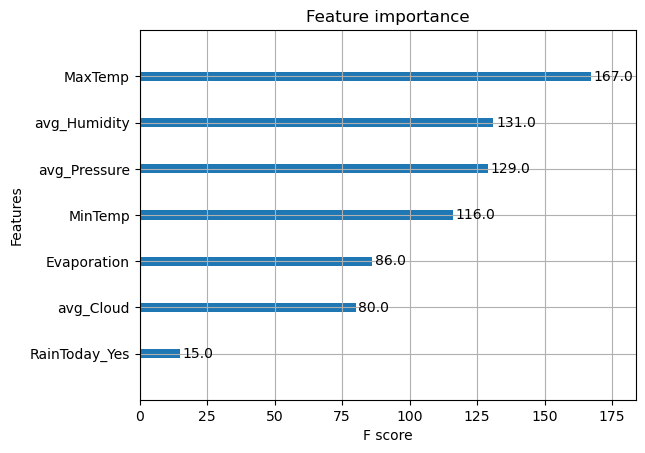

In [259]:
xgb.plot_importance(xgb_clf)

### F1_score

At last we will find f1_score for evaluating all model's performance simulatneously.

In [293]:
from sklearn.metrics import f1_score

In [294]:
f1_score(y_train, y_train_pred) #for Logistic regression #for train data

0.615

In [295]:
f1_score(y_test, y_test_pred) #for Logistic regression #for test data

0.5474452554744527

In [296]:
f1_score(y_train, y_train_pred_lda) #for LDA #for train data

0.6134868421052633

In [297]:
f1_score(y_test, y_test_pred_lda) #for LDA #for test data

0.5571428571428573

In [298]:
f1_score(y_train, y_train_pred_knn) #for KNN #for train data

0.6644295302013423

In [299]:
f1_score(y_test, y_test_pred_knn) #for KNN #for test data

0.509090909090909

In [300]:
f1_score(y_train, y_train_pred_dt) #for DecisionTreeClassifier #for train data

0.5102639296187683

In [301]:
f1_score(y_test, y_test_pred_dt) #for DecisionTreeClassifier #for test data

0.4484304932735426

In [302]:
f1_score(y_train, y_train_pred_rf) #for RandomForestClassifier #for train data

1.0

In [303]:
f1_score(y_test, y_test_pred_rf) #for RandomForestClassifier #for test data

0.5653710247349822

In [304]:
f1_score(y_train, y_train_pred_bag) #for BaggingClassifier #for train data

0.549718574108818

In [305]:
f1_score(y_test, y_test_pred_bag) #for BaggingClassifier #for test data 

0.5338983050847457

In [306]:
f1_score(y_train, y_train_pred_ada) #for AdaBoostClassifier #for train data

0.7122602168473728

In [307]:
f1_score(y_test, y_test_pred_ada) #for AdaBoostClassifier #for test data

0.5547445255474452

In [308]:
f1_score(y_train, y_train_pred_gb) #for GradientBoostingClassifier #for train data

0.6819727891156463

In [309]:
f1_score(y_test, y_test_pred_gb) #for GradientBoostingClassifier #for test data

0.5407407407407407

In [310]:
f1_score(y_train, y_train_pred_xgb) #for XGBoostClassifier #for train data

0.6638225255972696

In [311]:
f1_score(y_test, y_test_pred_xgb) #for XGBoostClassifier #for test data

0.5746268656716418

### 1. Your views about the problem statement?

The problem statement states to create the machine learning model using various Classification Models to predict rainfall. 

"The Daily Buzz" a small newspaper company of Sydney started a new column "The Weather Oracle" for their newspaper to attract more readers and stay ahead of competition. Therefore, they hired an ML expert to create an ML model to accurately predict the rainfall in Sydney.

The problem demands to create decision trees and use ensemble techniques for better prediction and then use various model evaluation metrics to evaluate the various model's performance

### 2. What will be your approach to solving this task?

The step by step approach to solve this task is as follows- 

1. First load the 'sydney_rain prediction' data and preprocess it like missing value imputation, outliers treatment if present any, dummy variable creations, creating visualizations like jointplot and countplot for determining outliers.

2. Next step will be the correlation analysis to see the relationship between variables and then X-y split to show the dependent and independent variables. 

3. After dividing the data into training and test data, I will try all the available models to solve this task.

4. At last the model with best accuracy_score, precision_score, recall_score, roc_auc_score and f1_score will decide to predict the rainfall of the Sydney.

### 3. What were the available ML model options you had to perform this task?

The available ML model options I had to perform this task are as follows-

1. Logistic Regression
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Decision Tree Classifier

Various Ensemble Techniques like- 

1. Bagging
2. Random Forest
3. Gradient Boosting
4. Ada Boost 
5. XGBoost

### 4. Which model’s performance is best and what could be the possible reason for that?

For the determining the best model for the given data I will mainly consider the f1_score, roc_auc_score and accuracy_score for the test data as model evaluation metrics.

For the given data XGBoost is performing best with 
f1_score = 0.574, 
roc_auc_score = 0.711, 
accuracy_score = 0.829

However this f1_score is still not that much good but among all the models XGBoost is performing best because it uses more regularized model formalization to control over-fitting, which gives it better performance.

### 5. What steps can you take to improve this selected model’s performance even further?

With better data preprocessing and outliers treatment, overfitting will reduce and model enhance its performance for unseen data as well. 

Besides this, there are many parameters of XGBoost like general parameters, booster parameters and learning-task parameters. With the correct parameters, XGBoost will improve its performance.